# Text Mining Exercise

Tasks: 


Modify the valence function:
 - Remove punctuation (“hate.” should match our dictionary)
 - Adjust for whether the previous word is one of these negators: not, never, no, none, nobody, nothing, don’t, doesn’t, won’t, shan’t, didn’t, shouldn’t, wouldn’t, couldn’t, can’t, cannot, neither, nor
 
Apply the function to your corpus
 - Can use the beer reviews data again
 - Or any textual data you have collected for your final project
 
Analyze the results
 - Is there lift in the association b/w valence and overall rating (or any other metrics you have)
 - Examine the top/bottom records. Do the valence scores make sense?
 
How else could you improve the function?
 - Bonus: find the most frequent words that are not in the valence dictionaries. Do any of these seem meaningful/important?

In [1]:
# load valence lists

poswords = []
with open("poswords.txt") as f:
    for word in f:
        word = word.strip()
        poswords.append(word)
print(len(poswords),'positive words loaded:', poswords[0:5], '\n')

negwords = []
with open("negwords.txt") as f:
    for word in f:
        word = word.strip()
        negwords.append(word)
print(len(negwords), 'negative words loaded:', negwords[0:5])

2006 positive words loaded: ['a+', 'abound', 'abounds', 'abundance', 'abundant'] 

4783 negative words loaded: ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [190]:
newords = ["not", "never", "no", "none", "nobody", 
               "nothing", "don’t", "doesn’t", "won’t", "shan’t", 
               "didn’t", "shouldn’t", "wouldn’t", "couldn’t", "can’t",
               "cannot", "neither", "nor"]
print(newords)

['not', 'never', 'no', 'none', 'nobody', 'nothing', 'don’t', 'doesn’t', 'won’t', 'shan’t', 'didn’t', 'shouldn’t', 'wouldn’t', 'couldn’t', 'can’t', 'cannot', 'neither', 'nor']


# Modifying Valence Function 
 - Remove punctuation (“hate.” should match our dictionary)
 - Adjust for whether the previous word is one of these negators: not, never, no, none, nobody, nothing, don’t, doesn’t, won’t, shan’t, didn’t, shouldn’t, wouldn’t, couldn’t, can’t, cannot, neither, nor
 

In [260]:
import string 
string.punctuation
#create valence function that would take away punctuation and improve our algorithm 

def valence(text):
    text = str(text)
    table = str.maketrans("","", string.punctuation)
    new_text = text.translate(table)
    #put text into lower-case
    new_text = new_text.lower().strip()
    #split text into words
    words = new_text.split()
    # removing punctuation  
    
    #negator words 
    #previousword = words[words.index()-1]
    
    #count how many words from the text are in the positive and negative lists
    posct, negct = 0, 0
    for i, w in enumerate(words):
    
       # if w in poswords:
        #    posct += 1
        #    print('pos:', w)
            
        #elif w in negwords: # or w in w[i-1] in newords:
         #  negct += 1 
          #  print('neg:', w)
            
        if w in poswords and words[i-1] in newords:
            negct += 1
            print('neg:', w)
            
        elif w in negwords and words[i-1] in newords:
             posct += 1
             print('pos:', w)
        
        elif w in poswords:
            posct += 1
            print('pos:', w)
            
        elif w in negwords:
            negct += 1 
            print('neg:', w)
            
    print(posct, negct)
    
    
    # if the prior word is neword then it should be negative 
    
    #create a summary measure of the text's valence
    result = (posct - negct) / len(words)
    return result

In [183]:
words = ['I', 'like', 'it']
for i, word in enumerate(words):
    print(i, ':', word)

0 : I
1 : like
2 : it


In [268]:
# test the function on "Hate." and see if it matches 
#s = 'Hate.'
s = "not good"
print(valence(s))

neg: good
0 1
-0.5


In [269]:
valence('good.')

pos: good
1 0


1.0

# Applying Function to a Dataset 

In [270]:
#load in text to analyze
import pandas as pd

df = pd.read_csv('beer_reviews.txt', sep = '\t')
print(df.shape)
df.head()

(250, 3)


,style,overall,review
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ..."
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac..."
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit..."
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca..."


In [271]:
# examine an individual review
print(df.loc[0, 'review'])

A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.


In [272]:
s = df.loc[0, 'review']
print(s)
print(valence(s))

A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.
neg: smell
pos: good
neg: dark
pos: lively
2 2
0.0


In [273]:
# apply function to all reviews
import time
start = time.time()

df['score'] = df['review'].apply(valence)

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')

df.head()

neg: smell
pos: good
neg: dark
pos: lively
2 2
neg: dark
neg: smell
pos: bad
neg: bitterness
neg: exceptional
pos: bad
2 4
pos: compact
pos: bad
neg: smell
neg: exceptional
pos: pleasant
neg: dust
neg: bitterness
pos: defect
pos: bad
5 4
pos: golden
pos: compact
pos: good
pos: fresh
neg: smell
pos: good
pos: good
pos: fresh
pos: pleasant
pos: sweet
pos: bad
pos: sweet
pos: sweet
pos: honest
13 1
pos: good
pos: goodness
pos: pretty
neg: faint
pos: like
pos: enough
pos: sweet
neg: avalanche
neg: bitterness
pos: fairly
neg: bitter
pos: good
pos: well
neg: hard
pos: impressive
10 5
neg: cloudy
pos: top
neg: smell
pos: crisp
pos: powerful
pos: sweetness
pos: well
pos: refreshing
pos: right
pos: like
pos: smooth
pos: refreshing
neg: spectacular
pos: nice
pos: liked
12 3
pos: nice
pos: golden
pos: clear
pos: nice
pos: nice
pos: nice
pos: like
pos: liked
pos: liked
9 0
neg: redundant
pos: clear
neg: lack
pos: good
pos: warmer
pos: decent
pos: great
5 2
pos: like
pos: reasonably
neg: cheap
neg:

pos: enjoy
pos: great
pos: loved
neg: smoke
pos: like
pos: good
16 6
pos: decent
neg: faint
neg: sticky
pos: bright
neg: smells
neg: smoke
pos: slick
pos: smooth
neg: smoke
pos: top
pos: love
pos: clean
7 5
pos: rich
pos: soft
pos: glow
neg: poorly
pos: enjoy
pos: good
pos: well
pos: positive
pos: delicate
pos: shine
neg: odd
pos: worth
pos: lighter
neg: slower
pos: hurt
neg: bad
pos: enjoyed
pos: better
pos: robust
15 4
neg: dark
pos: fast
pos: sweet
pos: like
pos: nice
pos: smooth
neg: smoke
pos: sweet
neg: fierce
neg: smoke
6 4
pos: clear
pos: attractive
neg: dark
pos: attractive
pos: nice
pos: nice
neg: smells
pos: like
neg: smoke
pos: sweet
pos: delectable
neg: mess
pos: nice
neg: smoke
pos: sweet
neg: dark
pos: nice
pos: well
neg: sticky
pos: pretty
pos: good
pos: great
15 7
pos: solid
pos: beautiful
pos: sweet
neg: smoke
neg: smell
neg: intense
neg: smoke
pos: fine
pos: sweetness
pos: great
pos: sweet
pos: nice
pos: smooth
pos: best
pos: well
pos: cheaper
pos: good
13 4
pos: nic

pos: recommend
neg: worse
7 5
neg: pale
pos: rich
pos: gold
neg: hazy
pos: resilient
neg: smell
pos: fairly
neg: faint
neg: bitter
pos: like
neg: sour
pos: strong
neg: pale
pos: crisp
pos: clean
neg: pale
neg: sour
pos: great
pos: like
neg: overpriced
10 10
pos: love
pos: great
pos: fresher
pos: faster
pos: easier
pos: golden
neg: chill
pos: decent
neg: falls
neg: disapointing
pos: sweet
pos: rich
neg: sour
neg: lemon
neg: bitter
pos: sweetness
10 6
pos: nice
pos: golden
neg: pale
neg: smell
pos: wonderful
pos: nice
pos: greatest
pos: ease
6 2
pos: golden
neg: haze
pos: nice
neg: sticky
neg: smell
pos: supported
pos: backbone
pos: crisp
neg: bitterness
pos: clean
pos: incredibly
neg: pale
7 5
neg: pale
pos: clear
pos: sweet
neg: smell
pos: powerful
neg: pale
pos: good
pos: good
pos: sharp
pos: good
pos: solid
neg: pale
8 4
pos: solid
neg: smell
neg: pale
pos: nicely
neg: pale
neg: pale
pos: enjoyed
neg: hard
3 5
neg: ugly
pos: love
neg: pale
pos: good
neg: smell
pos: stronger
neg: pale

pos: bright
pos: well
pos: balanced
neg: lacking
pos: better
neg: pale
pos: winner
6 5
neg: slowly
pos: snappy
neg: lemon
pos: improves
neg: pale
neg: bitterness
neg: lemon
pos: well
pos: cleanly
pos: like
pos: soft
pos: clean
pos: great
pos: hot
neg: pale
pos: great
neg: bump
10 7
pos: perfect
neg: pale
pos: sweet
neg: stuck
neg: slowly
neg: grainy
pos: sweet
neg: bitterness
pos: lighter
pos: slick
pos: pretty
neg: odd
neg: weak
6 7
neg: hazy
neg: pale
pos: reasonable
pos: better
neg: bitterness
pos: dominates
pos: nice
pos: sweet
pos: well
pos: slick
neg: bitterness
neg: shocking
neg: bomb
7 6
neg: chill
neg: haze
pos: good
pos: pleasantly
neg: pale
pos: crisp
pos: sweetness
pos: backbone
pos: balanced
pos: crisp
neg: bitterness
pos: nice
pos: crisp
pos: refreshing
pos: pretty
pos: good
pos: nice
13 4
pos: nice
neg: pale
pos: golden
neg: bad
neg: faint
neg: smell
neg: smells
pos: crisp
pos: nice
pos: crisp
neg: bitterness
pos: fairly
pos: like
pos: solid
pos: pretty
pos: refreshing
p

pos: good
pos: good
neg: smell
pos: good
pos: nice
neg: smell
neg: wrong
neg: bad
pos: good
neg: bitterness
pos: nice
pos: strong
neg: grainy
neg: hell
pos: like
pos: good
pos: sweet
neg: attack
neg: distracting
neg: good
pos: fine
neg: undesirable
neg: bitterness
pos: glad
neg: fond
pos: like
neg: stab
17 14
pos: bright
neg: dense
pos: nice
2 1
pos: golden
pos: well
pos: lighter
pos: great
pos: good
5 0
pos: golden
neg: dense
pos: clean
pos: sweet
pos: nice
pos: work
pos: crisp
pos: perfect
neg: bitterness
pos: solid
neg: pale
8 3
pos: nice
pos: gold
neg: slowly
pos: good
pos: solid
neg: pale
pos: good
pos: well
pos: good
neg: pale
pos: fine
pos: good
pos: good
neg: pale
pos: crisp
neg: bitter
pos: enjoyable
12 5
neg: cloudy
pos: pleasant
neg: pales
pos: enough
pos: balanced
pos: balanced
pos: well
neg: bland
neg: lost
neg: sticky
pos: decent
pos: enough
7 5
neg: cracked
neg: pale
pos: clear
neg: pale
pos: golden
neg: lemon
pos: sweet
pos: decent
pos: adequate
pos: pretty
6 4
pos: bri

,style,overall,review,score
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...,0.000000
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ...",-0.032787
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac...",0.014493
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit...",0.162162
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca...",0.024876


count    250.000000
mean       0.046697
std        0.041364
min       -0.056604
25%        0.017734
50%        0.044556
75%        0.070384
max        0.189189
Name: score, dtype: float64

correlation w/ rating: 0.257


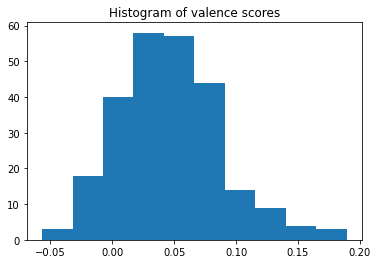

In [274]:
# examine the results
from matplotlib import pyplot as plt

print(df.score.describe())
print('\ncorrelation w/ rating:', df.score.corr(df.overall).round(3))
plt.hist(df.score)
plt.title('Histogram of valence scores')
plt.show()

# Analyzing Results 
 - Is there lift in the association b/w valence and overall rating (or any other metrics you have)
 - Examine the top/bottom records. Do the valence scores make sense?

With additional changes and improvements to the valence function the correlation w/rating has improved from 0.211 to 0.257. Moreover, there was a lift in the overall statistics. The mean has increased from 0.038 to 0.047, the SD has also increased from 0,036 to 0.041. The median valence score is now 0.045 instead of 0.034. The maximum valence number has also increased from 0.179 to 0.189. Looking at the histogram, we can also see that the distribution has changed of the valence score slightly. It seems that it has a smoother shape. 

In [275]:
df.sort_values(by=['score'])

,style,overall,review,score
240,Belgian Strong Dark Ale,4.0,"a: dark brown with amber highlights, no head o...",-0.056604
226,American Porter,3.5,I had this on tap last in August of 2009 at Ba...,-0.033898
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ...",-0.032787
114,American Pale Ale (APA),3.0,"Appearance: Pours a hazy, yellow-orange body w...",-0.030303
232,Belgian Strong Dark Ale,3.0,A: pours a dark mahogany with a finger of khak...,-0.028169
...,...,...,...,...
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit...",0.162162
152,American Pale Ale (APA),3.5,"A: Pours a clear golden color, not too much he...",0.164179
119,American Pale Ale (APA),4.5,"Pours a clear gold color, with a big impressiv...",0.181818
176,American Pale Ale (APA),4.0,A: Poured a nice golden color with good carbon...,0.183673


In [276]:
# the most negative review
s = df.loc[240, 'review']
print(s)
print(valence(s))

a: dark brown with amber highlights, no head or lacing. s: dark malts, medicine, little orange and rubbing alochol. t: malts, caramel, no medicine but dark fruits, other than bitters no other orange taste detected. m: full body with some bitterness. o: worth trying once, dont think i'll seek this one out again.
neg: dark
neg: dark
neg: dark
neg: bitterness
pos: worth
1 4
-0.05660377358490566


This review seems negative, but I would say it’s not the most negative review in the dataset. The algorithm shows that dark is a negative word but in this case its used to describe the color of the beer and is not necessarily a negative word. 

In [281]:
# the most negative review
s = df.loc[226, 'review']
print(s)
print(valence(s))

I had this on tap last in August of 2009 at Bailey's Taproom in Portland, Oregon. The colour was a very dark brown with a garnet base and a thin tan head. The aroma was full of coffee, roasted malt and chocolate. On the palate, there was light CO2, day old coffee, some dark chocolate and more roasted malt.
neg: dark
neg: dark
0 2
-0.03389830508474576


This is the second to the most negative review. The review seems very neutral as its more descriptive rather than opinionated. Again, we see that the algorithm has identified dark as negative word, I think it would be best to delete that word from the negative word dictionary.

In [278]:
#The most positive review 
s = df.loc[181, 'review']
print(s)
print(valence(s))

A solid APA - hops bittering is a bit non-descript, but perhaps the cleanest flavor profile I've come across in this style. Nice carbonation. Lively, refined malt notes with firm, consistent hops bittering throughout. Excellent drinkability and sessionablity.
pos: solid
pos: cleanest
pos: nice
pos: lively
pos: refined
pos: consistent
pos: excellent
7 0
0.1891891891891892


This seems like a fairly positive review. In this case I think the valence score makes sense.

In [283]:
#The most positive review 
s = df.loc[3, 'review']
print(s)
print(valence(s))

Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.
pos: golden
pos: compact
pos: good
pos: fresh
neg: smell
pos: good
pos: good
pos: fresh
pos: pleasant
pos: sweet
pos: bad
pos: sweet
pos: sweet
pos: honest
13 1
0.16216216216216217


Looking at this positive review I would say that I would actually not count "not bad" as a positive word. I think in this case it is either positive or still negative.  

# Conclusion - Further improvement: 

I would say that there are several improvements that we could make to the valence function. First there are some words as “dark” or “smell” that are counted as negative but with a beer review dataset such dictionary does not work well. Then I would say that sometimes negators are not as clear and could be still counted as positive or negative depending on the sentence context. I think this function also lacks in takin into account he subjectivity and word sequence. Using NLTK package can help with those aspects. 